# Fast Wavenet Mel-Spectogram 2 Wav Dummy Sample

Trains wavenet on a single mel file. Then generates that wav file, starting from a single sample.

In [1]:
from time import time

from wavenet.utils import make_batch
from wavenet.models import Model, Generator

from IPython.display import Audio

%matplotlib inline

In [2]:
import numpy as np

In [3]:
import numpy as np

from scipy.io import wavfile

import librosa

def normalize(data):
    temp = np.float32(data) - np.min(data)
    out = (temp / np.max(temp) - 0.5) * 2
    return out

def make_batch(path):
    data = wavfile.read(path)[1][:, 0]
    


    data_ = normalize(data)
    
    s_shape = data_.shape[0]
    
    S = librosa.feature.melspectrogram(y=data_, sr=44100)
    print(S.shape)
    S = np.reshape(S, (S.shape[0]*S.shape[1]))
    S = signal.resample(S, s_shape)
    print(S.shape)
    
    print(data)
    # data_f = np.sign(data_) * (np.log(1 + 255*np.abs(data_)) / np.log(1 + 255))

    bins = np.linspace(-1, 1, 256)
    print(bins)
    # Quantize inputs.
    inputs = np.digitize(S[0:-1], bins, right=False) - 1
    print(inputs)
    inputs = bins[inputs][None, :, None]
    print(inputs)

    # Encode targets as ints.
    targets = (np.digitize(data_[1::], bins, right=False) - 1)[None, :]
    print(targets)
    return inputs, targets

In [5]:
from scipy import signal
inputs, targets = make_batch('assets/voice.wav')

(128, 69)
(35316,)
[0 0 0 ... 0 0 0]
[-1.         -0.99215686 -0.98431373 -0.97647059 -0.96862745 -0.96078431
 -0.95294118 -0.94509804 -0.9372549  -0.92941176 -0.92156863 -0.91372549
 -0.90588235 -0.89803922 -0.89019608 -0.88235294 -0.8745098  -0.86666667
 -0.85882353 -0.85098039 -0.84313725 -0.83529412 -0.82745098 -0.81960784
 -0.81176471 -0.80392157 -0.79607843 -0.78823529 -0.78039216 -0.77254902
 -0.76470588 -0.75686275 -0.74901961 -0.74117647 -0.73333333 -0.7254902
 -0.71764706 -0.70980392 -0.70196078 -0.69411765 -0.68627451 -0.67843137
 -0.67058824 -0.6627451  -0.65490196 -0.64705882 -0.63921569 -0.63137255
 -0.62352941 -0.61568627 -0.60784314 -0.6        -0.59215686 -0.58431373
 -0.57647059 -0.56862745 -0.56078431 -0.55294118 -0.54509804 -0.5372549
 -0.52941176 -0.52156863 -0.51372549 -0.50588235 -0.49803922 -0.49019608
 -0.48235294 -0.4745098  -0.46666667 -0.45882353 -0.45098039 -0.44313725
 -0.43529412 -0.42745098 -0.41960784 -0.41176471 -0.40392157 -0.39607843
 -0.38823529 -0.

In [6]:
inputs.shape

(1, 35315, 1)

In [7]:
targets.shape[1]

35315

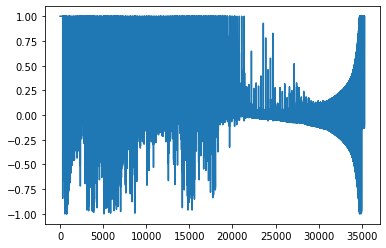

In [8]:
import matplotlib.pyplot as plt
plt.plot(inputs[0,:,0])
plt.show()

Audio(inputs[0,:,0], rate=44100)

(35316,)


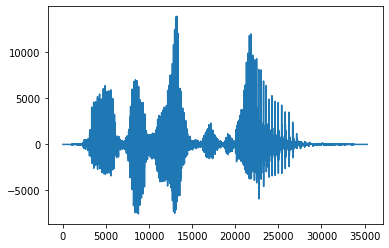

(128, 69)
(8832,)


In [9]:
import librosa
data = wavfile.read('assets/voice.wav')[1][:, 0]
print(data.shape)
plt.plot(data)
plt.show()
Audio(data, rate=44100)
data_ = normalize(data)
S = librosa.feature.melspectrogram(y=data_, sr=44100)
print(S.shape)
S = np.reshape(S, (S.shape[0]*S.shape[1]))
print(S.shape)

In [10]:
targets.shape

(1, 35315)

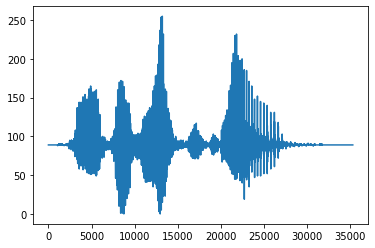

In [11]:
plt.plot(targets[0,:])
plt.show()
Audio(targets[0,:], rate=44100)

In [12]:
print(inputs.shape)
print(targets.shape)

(1, 35315, 1)
(1, 35315)


In [13]:
inputs, targets = make_batch('assets/voice.wav')
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1.0

model = Model(num_time_samples=num_time_samples,
              num_channels=num_channels,
              gpu_fraction=gpu_fraction)

Audio(inputs.reshape(inputs.shape[1]), rate=44100)

W0731 19:40:03.618536 10216 deprecation_wrapper.py:119] From C:\TTS_design\wavenet\models.py:26: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 19:40:03.645464 10216 deprecation_wrapper.py:119] From C:\TTS_design\wavenet\layers.py:136: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0731 19:40:03.650451 10216 deprecation_wrapper.py:119] From C:\TTS_design\wavenet\layers.py:89: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0731 19:40:03.658429 10216 deprecation.py:573] From c:\users\user\anaconda3\envs\tts\lib\site-packages\tensorflow\python\util\deprecation.py:574: calling conv1d (from tensorflow.python.ops.nn_ops) with data_format=NHWC is deprecated and will be removed in a future version.
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
W0731 19:40:03.676382 10216 deprecation.py:323] From C:\TTS_design\wavenet\layers.py:46

(128, 69)
(35316,)
[0 0 0 ... 0 0 0]
[-1.         -0.99215686 -0.98431373 -0.97647059 -0.96862745 -0.96078431
 -0.95294118 -0.94509804 -0.9372549  -0.92941176 -0.92156863 -0.91372549
 -0.90588235 -0.89803922 -0.89019608 -0.88235294 -0.8745098  -0.86666667
 -0.85882353 -0.85098039 -0.84313725 -0.83529412 -0.82745098 -0.81960784
 -0.81176471 -0.80392157 -0.79607843 -0.78823529 -0.78039216 -0.77254902
 -0.76470588 -0.75686275 -0.74901961 -0.74117647 -0.73333333 -0.7254902
 -0.71764706 -0.70980392 -0.70196078 -0.69411765 -0.68627451 -0.67843137
 -0.67058824 -0.6627451  -0.65490196 -0.64705882 -0.63921569 -0.63137255
 -0.62352941 -0.61568627 -0.60784314 -0.6        -0.59215686 -0.58431373
 -0.57647059 -0.56862745 -0.56078431 -0.55294118 -0.54509804 -0.5372549
 -0.52941176 -0.52156863 -0.51372549 -0.50588235 -0.49803922 -0.49019608
 -0.48235294 -0.4745098  -0.46666667 -0.45882353 -0.45098039 -0.44313725
 -0.43529412 -0.42745098 -0.41960784 -0.41176471 -0.40392157 -0.39607843
 -0.38823529 -0.

W0731 19:40:04.332561 10216 deprecation_wrapper.py:119] From C:\TTS_design\wavenet\models.py:50: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0731 19:40:05.259068 10216 deprecation_wrapper.py:119] From C:\TTS_design\wavenet\models.py:52: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0731 19:40:08.368577 10216 deprecation.py:323] From c:\users\user\anaconda3\envs\tts\lib\site-packages\tensorflow\python\util\tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [14]:
inputs.shape

(1, 35315, 1)

In [15]:
targets.shape

(1, 35315)

In [16]:
Audio(inputs.reshape(inputs.shape[1]), rate=44100)

c:\users\user\anaconda3\envs\tts\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


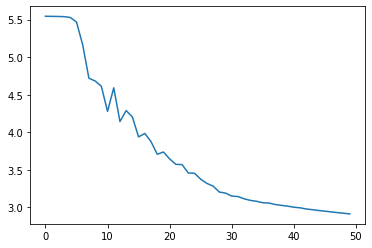

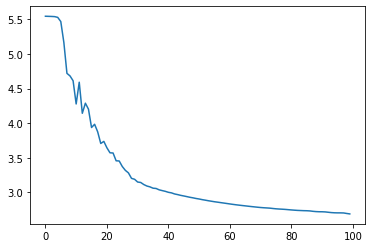

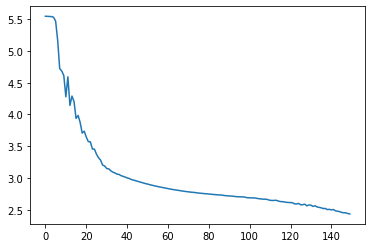

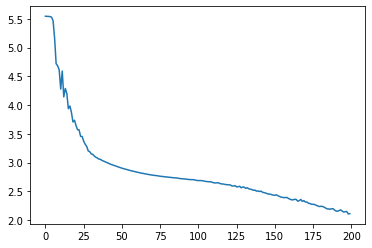

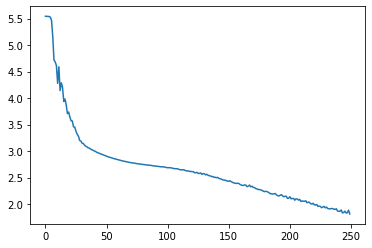

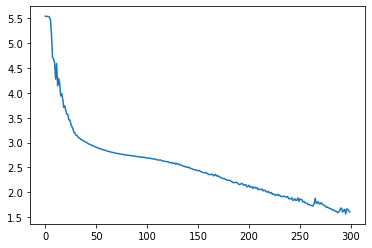

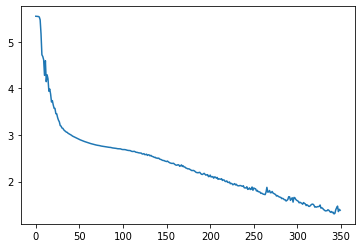

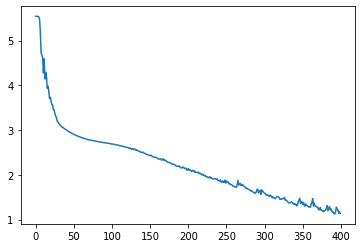

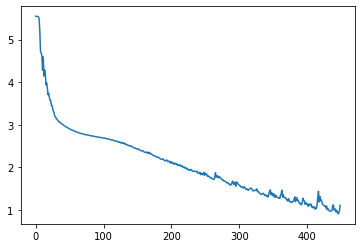

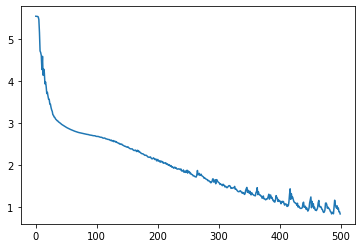

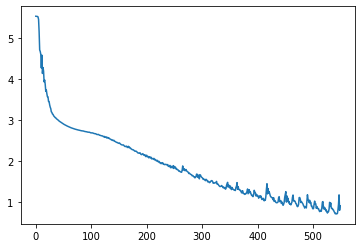

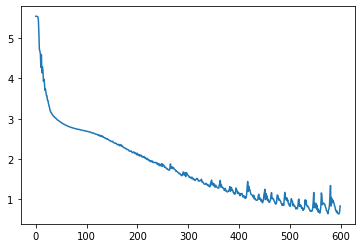

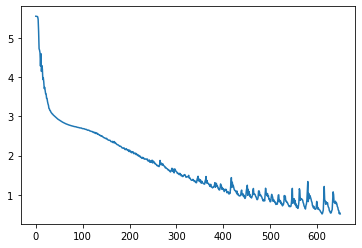

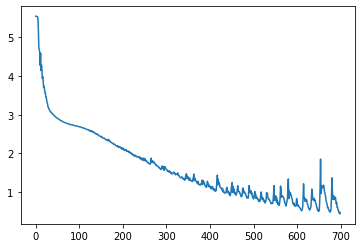

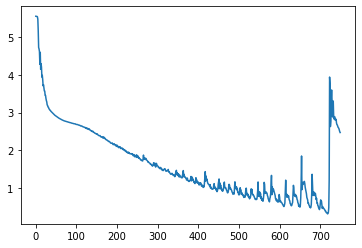

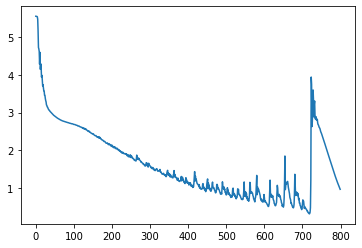

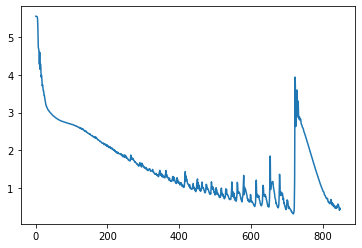

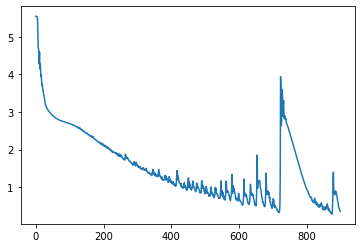

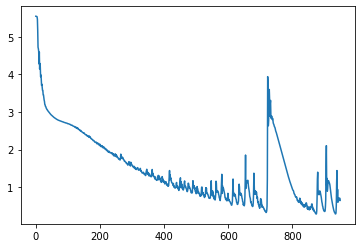

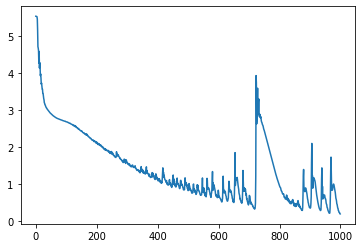

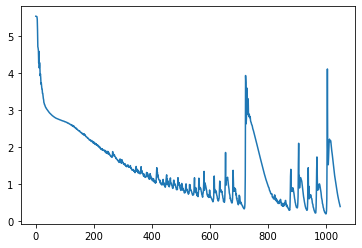

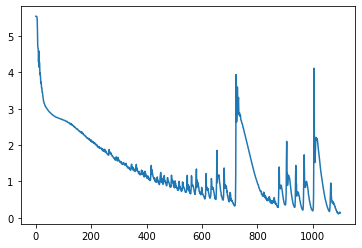

Training took 111.47688841819763 seconds.


In [17]:
tic = time()
model.train(inputs, targets)
toc = time()

print('Training took {} seconds.'.format(toc-tic))

Make Generator.


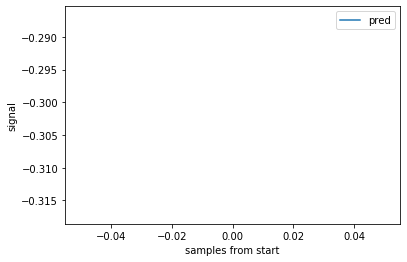

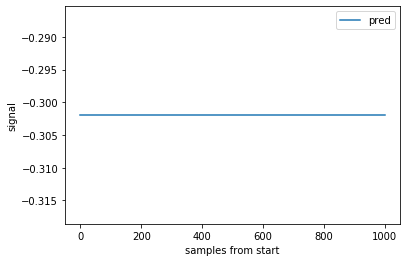

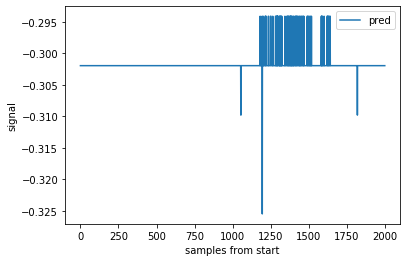

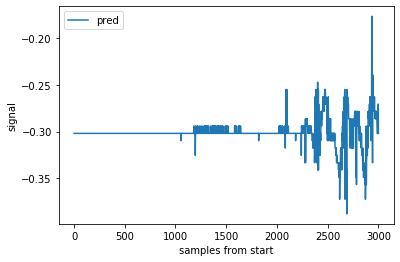

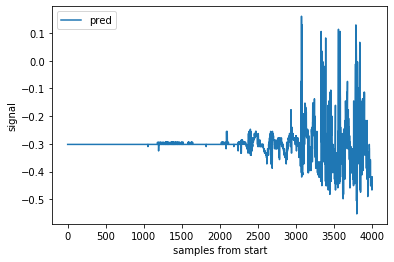

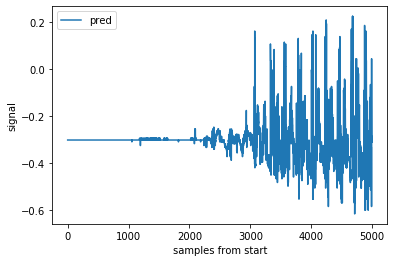

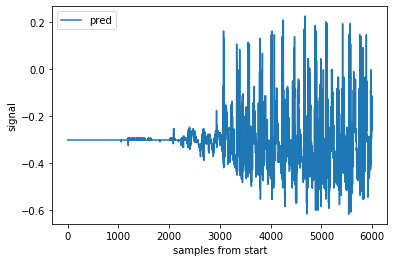

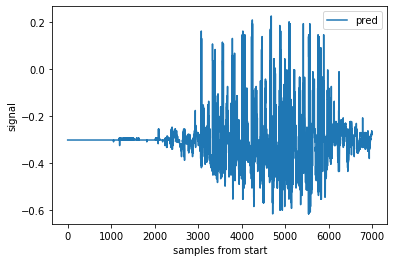

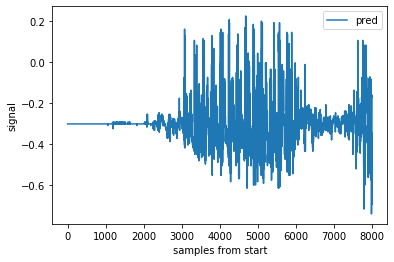

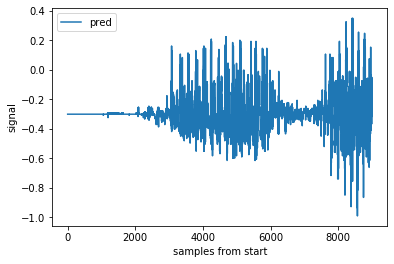

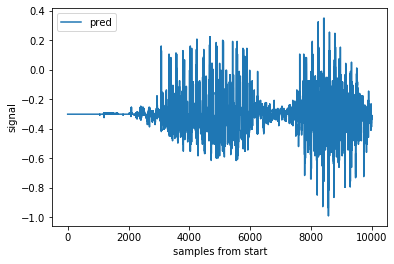

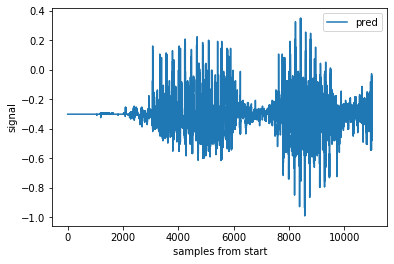

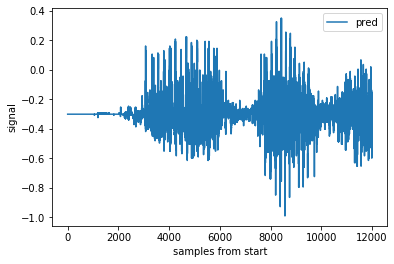

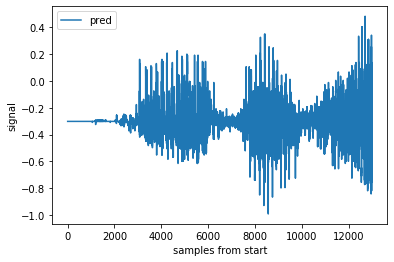

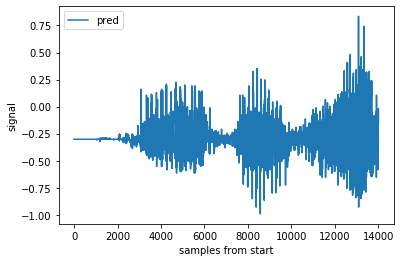

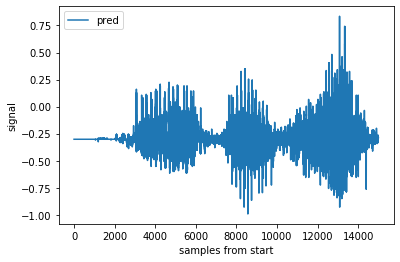

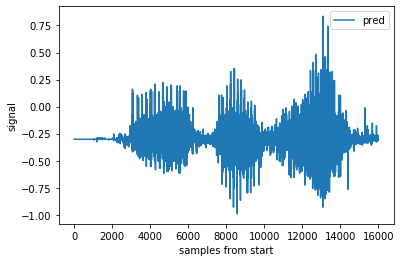

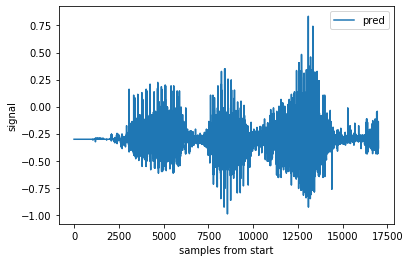

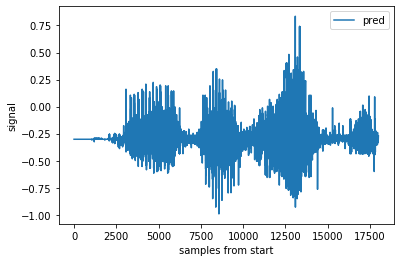

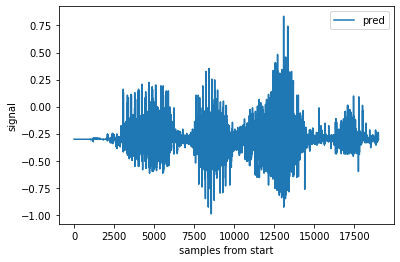

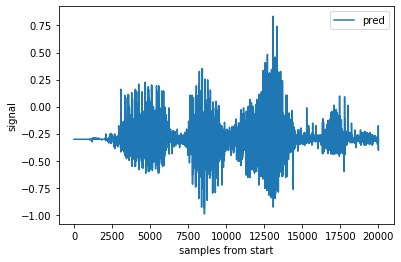

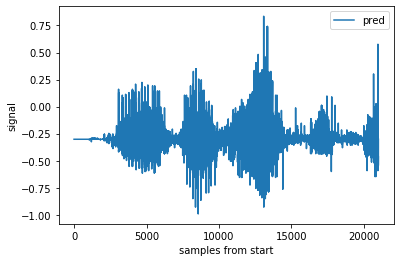

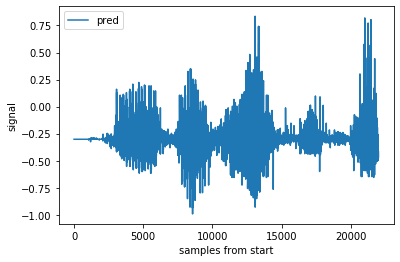

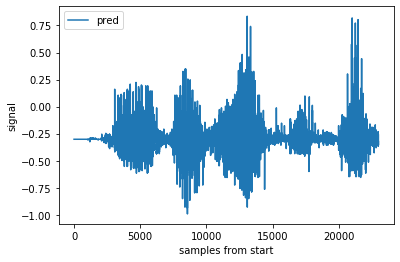

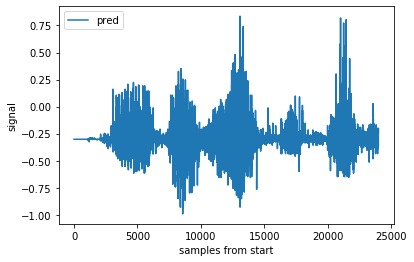

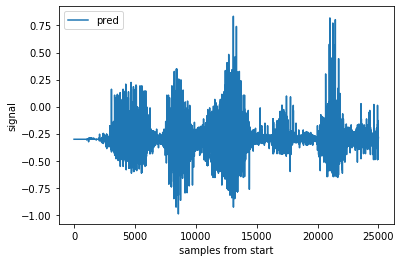

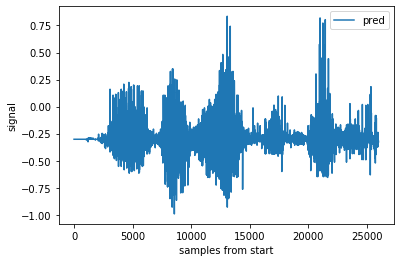

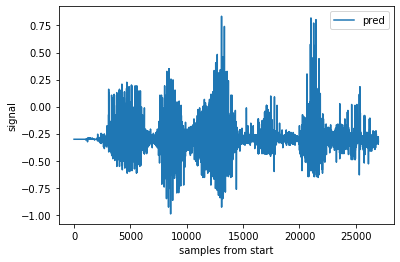

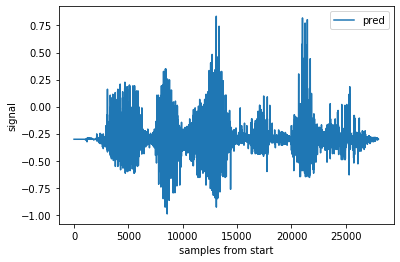

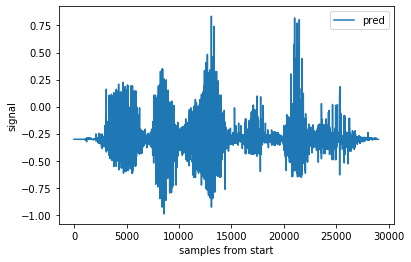

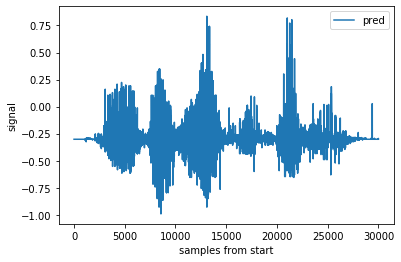

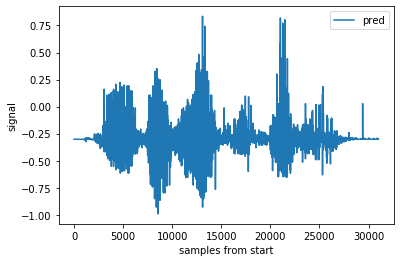

Generating took 147.71093368530273 seconds.


In [18]:
generator = Generator(model)

# Get first sample of input
input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, 32000)
toc = time()
print('Generating took {} seconds.'.format(toc-tic))

In [19]:
predictions.shape

(1, 32000)

In [20]:
Audio(predictions, rate=44100)